------ Data Mining Results ------
Basic statistics for total sleep hours:
count    5000.000000
mean        6.974902
std         1.454033
min         4.500000
25%         5.690000
50%         6.960000
75%         8.210000
max         9.500000
Name: Total Sleep Hours, dtype: float64

Sleep hours by gender:
        mean  median  count   std
Gender                           
Female  6.98    6.93   1675  1.44
Male    6.99    6.92   1718  1.46
Other   6.96    7.00   1607  1.46

Sleep hours by age group:
           mean  median  count   std
Age Group                           
18-25      6.97    6.93    974  1.47
26-35      7.06    7.08   1163  1.44
36-45      6.90    6.90   1154  1.43
46-55      6.98    6.97   1195  1.47
56+        6.95    6.94    514  1.49

Missing data count:
Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total S

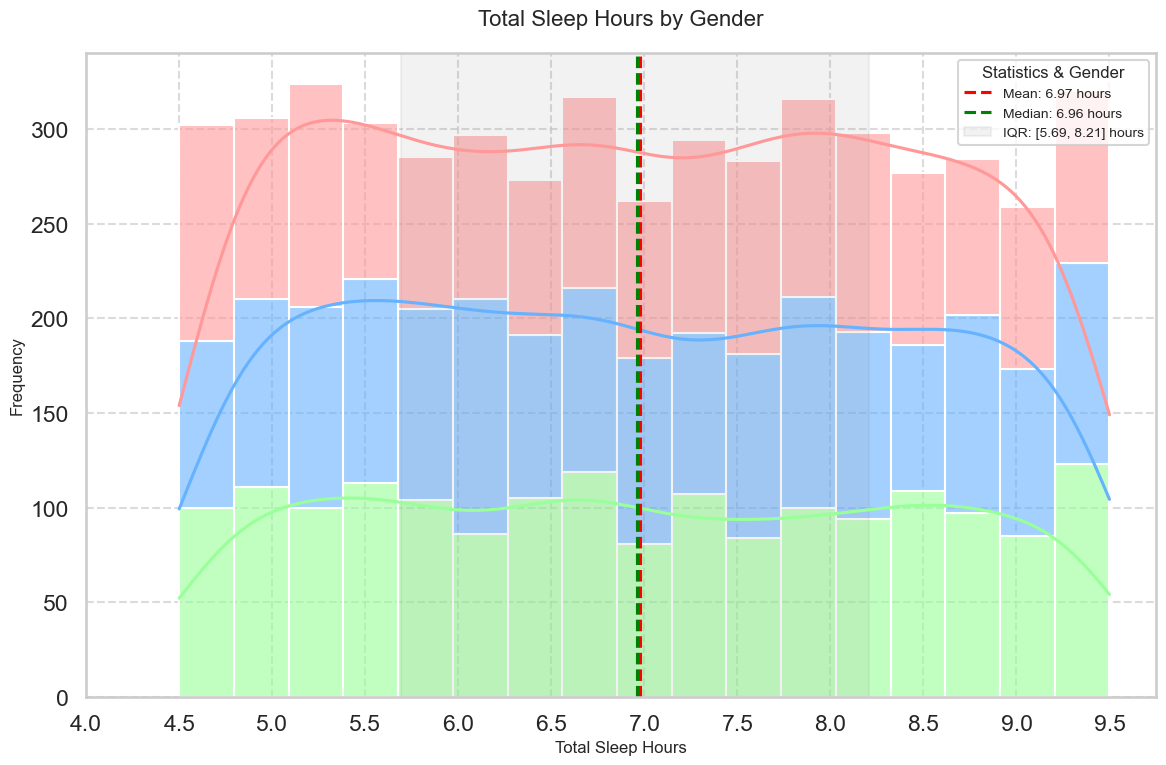

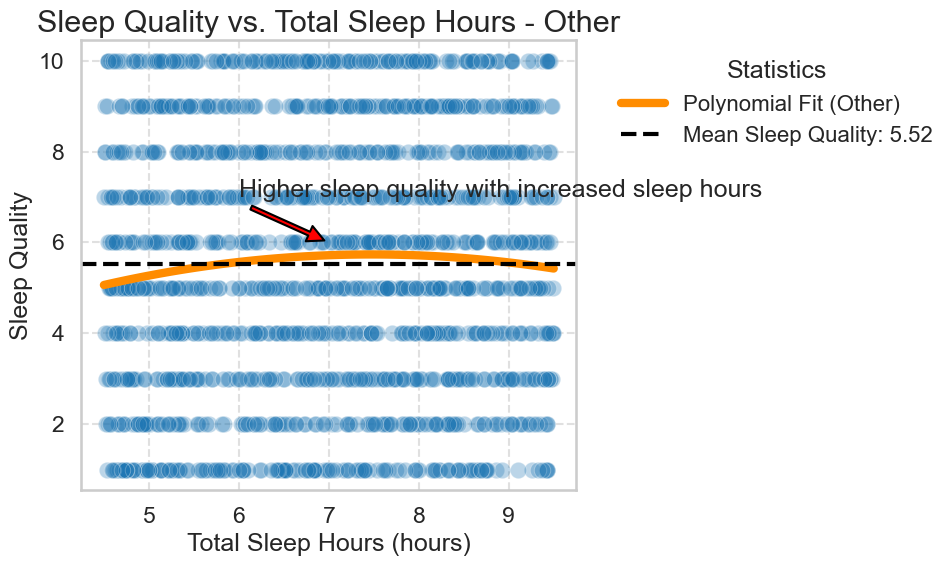

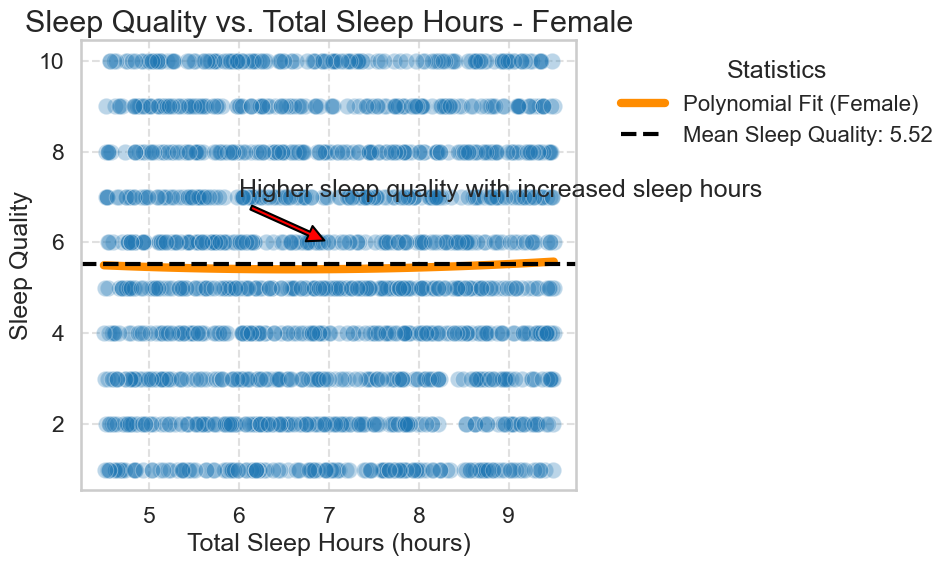

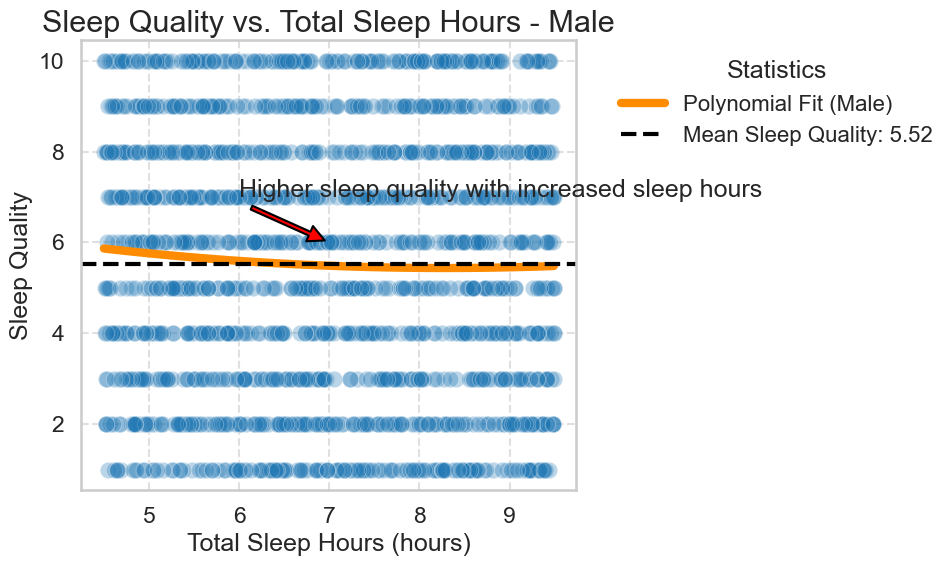

------ Sleep Quality Analysis by Gender -------
Basic statistics for sleep quality:
count    5000.000000
mean        5.520800
std         2.863845
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Sleep Quality, dtype: float64

Sleep quality by gender:
        mean  median  count   std
Gender                           
Female  5.45     5.0   1675  2.82
Male    5.55     6.0   1718  2.89
Other   5.56     6.0   1607  2.88

Missing data count:
Gender           0
Sleep Quality    0
dtype: int64

Outliers (IQR method): 0

Proportion of high sleep quality (>=8):
   Gender  Proportion (%)
0  Female           28.60
1    Male           30.79
2   Other           30.12

Skewness:
Gender
Female    0.03
Male     -0.01
Other    -0.01
Name: Sleep Quality, dtype: float64

Kurtosis:
Gender
Female   -1.18
Male     -1.25
Other    -1.20
Name: Sleep Quality, dtype: float64

ANOVA analysis - F-statistic: 0.68, p-value: 0.5073


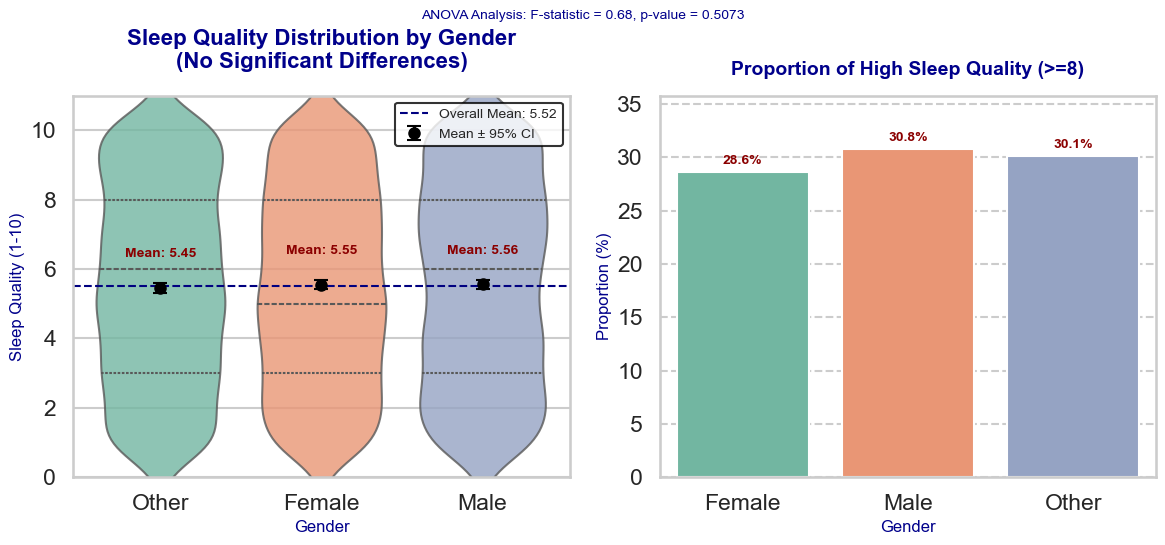

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, spearmanr
import numpy as np

data = pd.read_csv(r"C:\Users\10759\Desktop\sleep_cycle_productivity.csv")
data['Date'] = pd.to_datetime(data['Date'])
sns.set_style('whitegrid')
sns.set_context('talk')
print("------ Data Mining Results ------")
print("Basic statistics for total sleep hours:")
print(data['Total Sleep Hours'].describe())

# Group by gender
gender_stats = data.groupby('Gender')['Total Sleep Hours'].agg(['mean', 'median', 'count', 'std']).round(2)
print("")
print("Sleep hours by gender:")
print(gender_stats)

# Group by age group
bins = [18, 26, 36, 46, 56, data['Age'].max() + 1]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
age_group_stats = data.groupby('Age Group', observed=False)['Total Sleep Hours'].agg(['mean', 'median', 'count', 'std']).round(2)
print("")
print("Sleep hours by age group:")
print(age_group_stats)

# Check for missing data
missing_data = data.isnull().sum()
print("")
print("Missing data count:")
print(missing_data)

#  identify outliers
Q1 = data['Total Sleep Hours'].quantile(0.25)
Q3 = data['Total Sleep Hours'].quantile(0.75)
IQR = Q3 - Q1
outliers_custom = data[(data['Total Sleep Hours'] < 5) | (data['Total Sleep Hours'] > 9)]
print("")
print(f"Outliers with custom threshold (<5 or >9 hours): {len(outliers_custom)}")

# Correlation Analysis
pearson_corr = data['Total Sleep Hours'].corr(data['Sleep Quality'])
spearman_corr, _ = spearmanr(data['Total Sleep Hours'], data['Sleep Quality'])
print("")
print(f"Pearson correlation: {pearson_corr:.2f}")
print(f"Spearman correlation: {spearman_corr:.2f}")

# Categorical Trend analysis
contingency_table = pd.crosstab(data['Sleep Quality'], pd.cut(data['Total Sleep Hours'], bins=[4, 5, 6, 7, 8, 9, 10], 
                                labels=['<5', '5-6', '6-7', '7-8', '8-9', '>9']))
print("")
print("Contingency table of sleep quality vs. total sleep hours:")
print(contingency_table)

# ANOVA for gender effect
f_stat, p_value = f_oneway(data[data['Gender'] == 'Female']['Total Sleep Hours'],
                           data[data['Gender'] == 'Male']['Total Sleep Hours'],
                           data[data['Gender'] == 'Other']['Total Sleep Hours'])
print("")
print(f"ANOVA analysis - F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

#visualization section
mean_sleep = data['Total Sleep Hours'].mean()
median_sleep = data['Total Sleep Hours'].median()
q1, q3 = data['Total Sleep Hours'].quantile([0.25, 0.75])
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Total Sleep Hours', hue='Gender', multiple='stack', 
             palette=['#FF9999', '#66B2FF', '#99FF99'], alpha=0.6, kde=True)
plt.axvline(mean_sleep, color='red', linestyle='--', label=f'Mean: {mean_sleep:.2f} hours')
plt.axvline(median_sleep, color='green', linestyle='--', label=f'Median: {median_sleep:.2f} hours')
plt.axvspan(q1, q3, color='gray', alpha=0.1, label=f'IQR: [{q1:.2f}, {q3:.2f}] hours')
plt.title('Total Sleep Hours by Gender', fontsize=16, pad=20)
plt.xlabel('Total Sleep Hours', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Statistics & Gender', fontsize=10, title_fontsize=12)
plt.xticks(np.arange(4, 10, 0.5))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(r'C:\Users\10759\Desktop\optimized_sleep_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot sleep quality vs. total sleep hours by gender
for gender in data['Gender'].unique():
    subset = data[data['Gender'] == gender]
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=subset, x='Total Sleep Hours', y='Sleep Quality', alpha=0.3, s=140, edgecolor='white', linewidth=0.7, ax=ax)
    coefficients = np.polyfit(subset['Total Sleep Hours'], subset['Sleep Quality'], 2)
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(min(subset['Total Sleep Hours']), max(subset['Total Sleep Hours']), 100)
    ax.plot(x_range, polynomial(x_range), color='darkorange', linewidth=6, label=f'Polynomial Fit ({gender})')
    mean_quality = data['Sleep Quality'].mean()
    ax.axhline(mean_quality, color='black', linestyle='--', linewidth=3, label=f'Mean Sleep Quality: {mean_quality:.2f}')
    ax.set_title(f'Sleep Quality vs. Total Sleep Hours - {gender}', fontsize=22)
    ax.set_xlabel('Total Sleep Hours (hours)', fontsize=18)
    ax.set_ylabel('Sleep Quality', fontsize=18)
    ax.legend(title='Statistics', fontsize=16, title_fontsize=18, loc='upper left', frameon=False, bbox_to_anchor=(1.05, 1))
    ax.annotate('Higher sleep quality with increased sleep hours', 
                xy=(7, 6), xytext=(6, 7), 
                arrowprops=dict(facecolor='red', shrink=0.05, width=3, headwidth=12, edgecolor='black'))
    ax.grid(True, linestyle='--', alpha=0.6)
    sns.set_style("whitegrid")
    plt.tight_layout()
    plt.savefig(r'C:\Users\10759\Desktop\sleep_quality_vs_hours_{gender}_refined.png', dpi=300, bbox_inches='tight')
    plt.show()

# Sleep quality analysis by gender
print("------ Sleep Quality Analysis by Gender -------")
print("Basic statistics for sleep quality:")
sleep_quality_stats = data['Sleep Quality'].describe()
print(sleep_quality_stats)

gender_stats = data.groupby('Gender')['Sleep Quality'].agg(['mean', 'median', 'count', 'std']).round(2)
print("")
print("Sleep quality by gender:")
print(gender_stats)

missing_data = data[['Gender', 'Sleep Quality']].isnull().sum()
print("")
print("Missing data count:")
print(missing_data)

Q1 = data['Sleep Quality'].quantile(0.25)
Q3 = data['Sleep Quality'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data[(data['Sleep Quality'] < Q1 - 1.5 * IQR) | (data['Sleep Quality'] > Q3 + 1.5 * IQR)]
print("")
print(f"Outliers (IQR method): {len(outliers_iqr)}")

high_quality = data[data['Sleep Quality'] >= 8].groupby('Gender').size() / data.groupby('Gender').size() * 100
high_quality = high_quality.reset_index(name='Proportion (%)')
print("")
print("Proportion of high sleep quality (>=8):")
print(high_quality.round(2))

skewness = data.groupby('Gender')['Sleep Quality'].skew().round(2)
kurtosis = data.groupby('Gender')['Sleep Quality'].apply(lambda x: x.kurt()).round(2)
print("")
print("Skewness:")
print(skewness)
print("")
print("Kurtosis:")
print(kurtosis)

f_stat, p_value = f_oneway(
    data[data['Gender'] == 'Female']['Sleep Quality'],
    data[data['Gender'] == 'Male']['Sleep Quality'],
    data[data['Gender'] == 'Other']['Sleep Quality']
)
print("")
print(f"ANOVA analysis - F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

# Visualize sleep quality distribution by gender
gender_sleep_quality = data.groupby('Gender')['Sleep Quality'].mean().reset_index()
overall_mean = data['Sleep Quality'].mean()

def compute_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    h = sem * 1.96
    return mean - h, mean + h

ci_data = []
for gender in gender_sleep_quality['Gender']:
    sleep_quality = data[data['Gender'] == gender]['Sleep Quality']
    ci_lower, ci_upper = compute_ci(sleep_quality)
    ci_data.append([ci_lower, ci_upper])
ci_data = np.array(ci_data)

fig = plt.figure(figsize=(12, 6), facecolor='white')
ax1 = fig.add_subplot(1, 2, 1)
sns.set_style("whitegrid", {"grid.linestyle": "--", "grid.alpha": 0.2})
sns.violinplot(x='Gender', y='Sleep Quality', hue='Gender', data=data, 
               palette=['#66c2a5', '#fc8d62', '#8da0cb'], inner='quartile', 
               linewidth=1.5, alpha=0.8, legend=False)
ax1.axhline(overall_mean, color='navy', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

for i, gender in enumerate(gender_sleep_quality['Gender']):
    mean_val = gender_sleep_quality.loc[i, 'Sleep Quality']
    ci_lower, ci_upper = ci_data[i]
    ax1.errorbar(i, mean_val, yerr=[[mean_val - ci_lower], [ci_upper - mean_val]], fmt='o', color='black', 
                 capsize=5, capthick=1.5, markersize=8, label='Mean ± 95% CI' if i == 0 else "")
    ax1.text(i, mean_val + 0.8, f'Mean: {mean_val:.2f}', ha='center', va='bottom', fontsize=10, 
             color='darkred', fontweight='bold')

ax1.set_title('Sleep Quality Distribution by Gender\n(No Significant Differences)', fontsize=16, fontweight='bold', pad=20, color='darkblue')
ax1.set_xlabel('Gender', fontsize=12, color='darkblue')
ax1.set_ylabel('Sleep Quality (1-10)', fontsize=12, color='darkblue')
ax1.set_ylim(0, 11)
fig.suptitle(f'ANOVA Analysis: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}', fontsize=10, y=0.92, color='darkblue')
ax1.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')
ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(x='Gender', y='Proportion (%)', hue='Gender', data=high_quality, 
            palette=['#66c2a5', '#fc8d62', '#8da0cb'], ax=ax2, legend=False)
for i, proportion in enumerate(high_quality['Proportion (%)']):
    ax2.text(i, proportion + 0.5, f'{proportion:.1f}%', ha='center', va='bottom', fontsize=10, 
             color='darkred', fontweight='bold')
ax2.set_title('Proportion of High Sleep Quality (>=8)', fontsize=14, fontweight='bold', pad=15, color='darkblue')
ax2.set_xlabel('Gender', fontsize=12, color='darkblue')
ax2.set_ylabel('Proportion (%)', fontsize=12, color='darkblue')
ax2.set_ylim(0, max(high_quality['Proportion (%)']) + 5)

plt.tight_layout()
plt.savefig(r'C:\Users\10759\Desktop\sleep_quality_distribution_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()